In [2]:
1+1

2

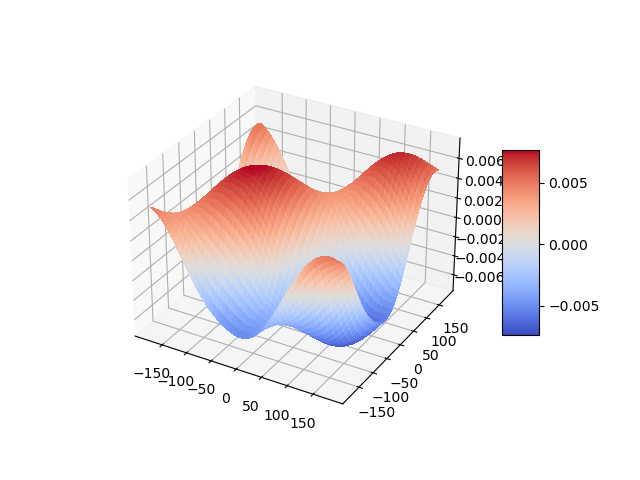

In [14]:
%matplotlib widget 
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

def V(phi1, phi2,R=1,a=0.1,qh=-1,qo=0.5, dphi=104*np.pi/180):
    total = qh**2/R
    for phi in [phi1, phi2]:
        total += qh*qo*(1/np.sqrt(R**2+a**2-2*R*a*np.cos(phi))+1/np.sqrt(R**2+a**2-2*R*a*np.cos(phi+dphi)))
    for phi1_, phi2_ in zip([phi1, phi1+dphi, phi1, phi1+dphi], [phi2, phi2, phi2+dphi, phi2+dphi]):
        total += qo*qo/(a*np.sqrt((np.sin(phi1_)-np.sin(phi2_))**2 + (np.cos(phi1_)+np.cos(phi2_)-R/a)**2))
    return total


X = np.linspace(-np.pi, np.pi, 100)
Y = np.linspace(-np.pi, np.pi, 100)          
X, Y = np.meshgrid(X, Y)
Z = V(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X*180/np.pi, Y*180/np.pi, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()